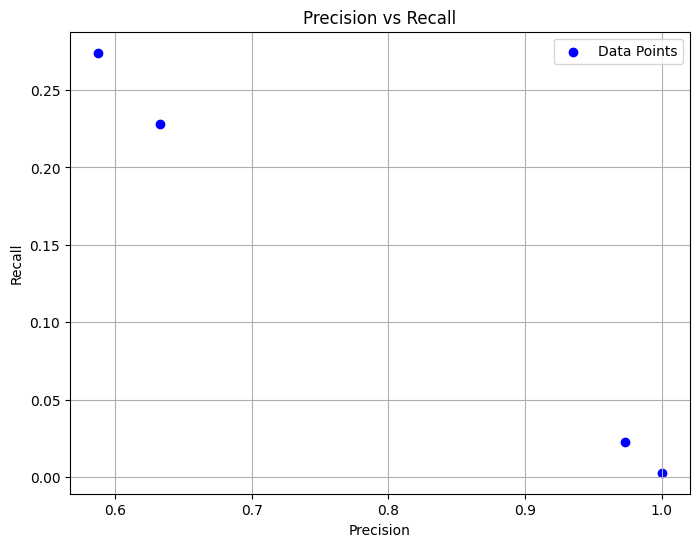

In [1]:
import json
import matplotlib.pyplot as plt

def filter_and_plot(input_file, filter):
    data_points = []  # Initialize a 2D array for storing [precision, recall]

    # Read and process the file line by line
    with open(input_file, 'r') as file:
        for line in file:
            try:
                # Parse the JSON object
                entry = json.loads(line.strip())

                # Check if "attack" is "mixed"
                if entry.get("attack") == filter:
                    # Extract "precision" and "recall"
                    precision = entry.get("precision")
                    recall = entry.get("recall")

                    # Ensure both precision and recall are valid numbers
                    if isinstance(precision, (int, float)) and isinstance(recall, (int, float)):
                        data_points.append([precision, recall])
            except json.JSONDecodeError as e:
                print(f"Invalid JSON: {e} in line: {line.strip()}")

    # Plot the data points
    if data_points:
        # Unpack the precision and recall values
        precision_values, recall_values = zip(*data_points)

        # Create the plot
        plt.figure(figsize=(8, 6))
        plt.scatter(precision_values, recall_values, c='blue', label='Data Points')
        plt.title("Precision vs Recall")
        plt.xlabel("Precision")
        plt.ylabel("Recall")
        plt.grid(True)
        plt.legend()
        plt.savefig(filter+"_diagramm.svg", format="svg")
    else:
        print("No data points to plot.")

if __name__ == "__main__":
    filter_and_plot("test_mixed.json","mixed")
    #filter_and_plot("output.json","rand_speed")
    #filter_and_plot("output.json","sudden_stop")
    #filter_and_plot("output.json","mix")

#To run in terminal: jupyter nbconvert --execute --to notebook plot_p_r.ipynbd